In [1]:
from tqdm import tqdm
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import plotly.express as px

In [2]:
items_meta = pd.read_parquet(f'data/items_meta.parquet.gzip')

In [3]:
embeddings = np.stack(items_meta.embeddings.values, axis=0)

In [4]:
print(embeddings.shape)
embeddings

(227606, 312)


array([[ 0.10458118,  0.04788015,  0.03094416, ..., -0.03620411,
        -0.01250116, -0.05199347],
       [ 0.03562511, -0.03926409, -0.03310334, ..., -0.01601689,
         0.03890869, -0.0721261 ],
       [ 0.08418761,  0.00673246, -0.00371123, ..., -0.03089557,
        -0.00018254, -0.00667501],
       ...,
       [ 0.13771634,  0.02355975,  0.01220456, ...,  0.03321721,
         0.01788543, -0.03148117],
       [ 0.04954276, -0.00674311, -0.04012159, ...,  0.04696486,
         0.01853791, -0.01878634],
       [ 0.0518581 ,  0.03374187, -0.01335717, ...,  0.00438905,
        -0.00330136, -0.03531639]], dtype=float32)

In [5]:
# Распределение в эмбедингах

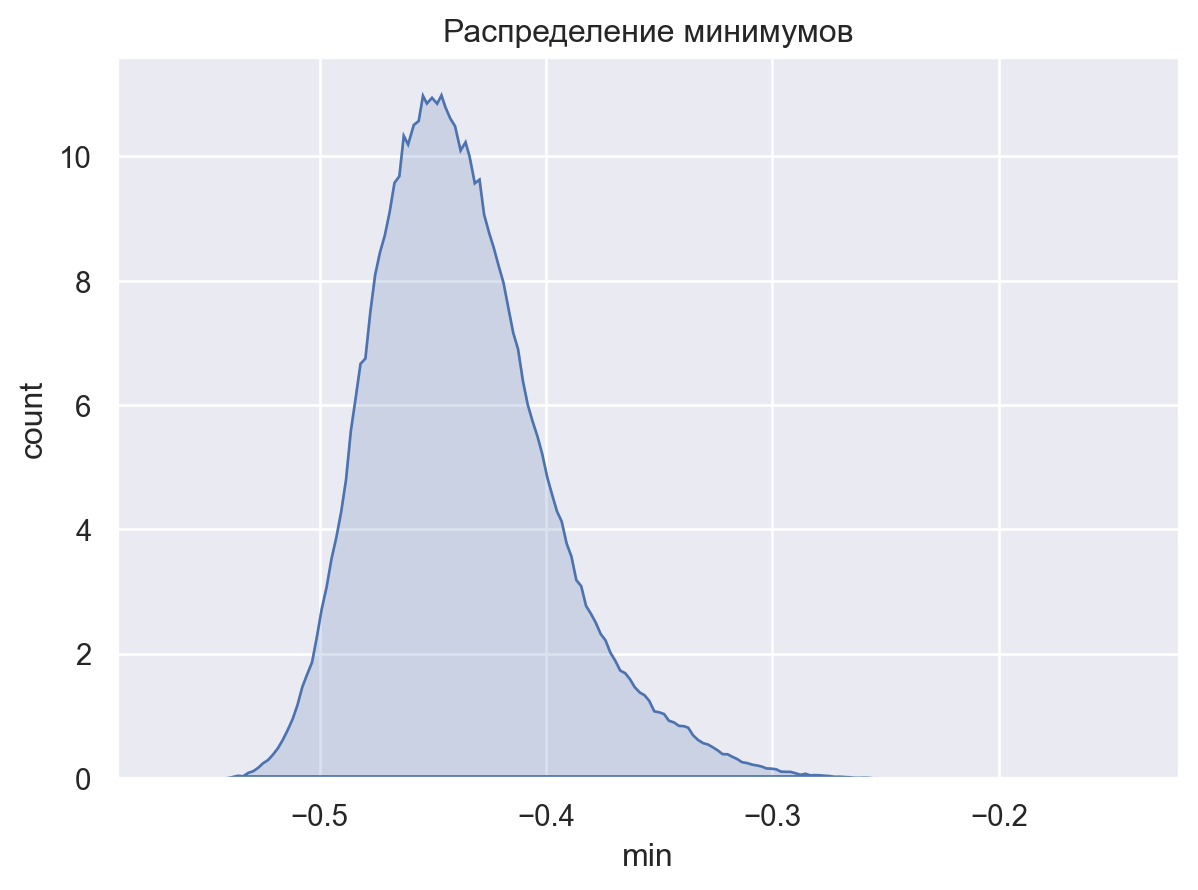

In [6]:
p = so.Plot(embeddings.min(axis=1)).add(so.Area(), so.KDE(bw_adjust=0.25))
p.label(title='Распределение минимумов', x='min', y='count')

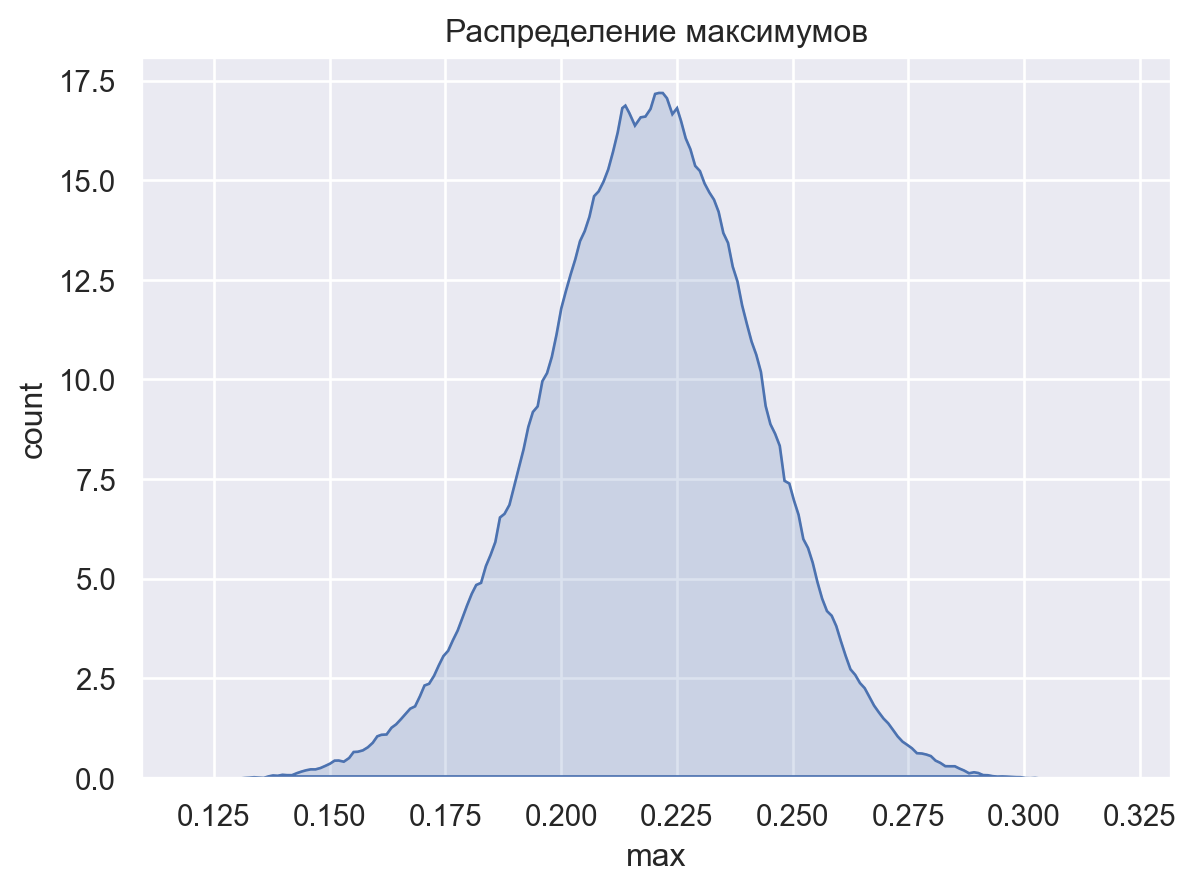

In [7]:
p = so.Plot(embeddings.max(axis=1)).add(so.Area(), so.KDE(bw_adjust=0.25))
p.label(title='Распределение максимумов', x='max', y='count')

In [8]:
pca = PCA(n_components=3)
pca.fit(np.transpose(embeddings))

PCA(n_components=3)

In [9]:
# fig = px.scatter_3d(x=pca.components_[0], y=pca.components_[1], z=pca.components_[2])
# fig.update_traces(marker_size = 1)
# fig.update_layout(
#     margin=dict(l=10, r=10, t=10, b=10),
# )
# fig.show()

In [10]:
from umap import UMAP
import umap

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA